In [169]:
import pandas as pd
import numpy as np

from eda_utils import *

In [170]:
incl = [
#IDs/Facility/Demographics/SES
 'Case Key',
 'Facility Key',
 'Facility Location',
 'Facility Type',
 'Age at Diagnosis',
 'Sex',
 'Race',
 'Spanish Hispanic Origin',
 'Primary Payor',
 'Census Median Income Quartiles 2008-2012',
 'Percent No High School Degree 2008-2012',
 'Percent No High School Degree Quartiles 2012-2016',
 'Median Income Quartiles 2012-2016',
 'Urban/Rural 2013',
 'Great Circle Distance',
 'Charlson-Deyo Score',
 'Year of Diagnosis',
 'Medicaid Expansion Status State Group',
#Tumor characteristics
 'Histology',
 'Grade 2004-2017',
 'Grade Clinical SSDI Item 3843',
 'Size of Tumor',
 'AJCC Clinical T',
 'AJCC Clinical N',
 'AJCC Clinical M',
 'AJCC Clinical Stage Group',
 'AJCC Pathologic T',
 'AJCC Pathologic N',
 'AJCC Pathologic M',
 'AJCC Pathologic Stage Group',

 'AJCC 8th Edition Clinical M',
 'AJCC 8th Edition Clinical N',
 'AJCC 8th Edition Clinical Stage Group',
 'AJCC 8th Edition Clinical T',
 'AJCC 8th Edition Pathologic M',
 'AJCC 8th Edition Pathologic N',
 'AJCC 8th Edition Pathologic Stage Group',
 'AJCC 8th Edition Pathologic T',
 'AJCC 8th Edition Post Pathologic Stage Group',
 'AJCC 8th Edition Post Pathologic M',
 'AJCC 8th Edition Post Pathologic N',
 'AJCC 8th Edition Post Pathologic Stage Group',
 'AJCC 8th Edition Post Pathologic T',

 'Metastatic Liver Involvement',
 'Lymph Vascular Invasion',
 'CS Site Specific Factor 1',
 'CS Site Specific Factor 3',
 'CS Site Specific Factor 7',
 'CS Site Specific Factor 8',
 'CS Site Specific Factor 9',

 'Tumor Size Summary 2016',
 'Metastatic Involvement Other',
 'Metastatic Liver Involvement.1',

 'CEA Pretreatment Interpretation SSDI Item 3819',
 'CEA Pretreatment Lab Value SSDI Item 3820',
 'KRAS SSDI Item 3866',
 'Perineural Invasion SSDI Item 3909',
 'Microsatellite Instability (MSI) SSDI Item 3890',
#Overall treatment characteristics
 'Palliative Care',
 'Palliative Care at this Facility',
#Surgery treatment characteristics
 'CS Site Specific Factor 5',
#  'Surgical Dx and Staging Procedure, Days from Dx',
#  'Surgical Diagnostic and Staging Procedure', 
 'Surgical Procedure of Primary Site at any CoC Facility',
#  'Treatment Started, Days from Dx',
#  'First Surgical Procedure, Days from Dx',
#  'Definitive Surgical Procedure, Days from Dx',
#  'Systemic/Surgery Sequence',
#  'Reason For No Surgery of Primary Site',
#Radiation treatment characteristics
#  'Radiation, Days from Dx',
#  'Location of Radiation Therapy',
 'Radiation Surgery Sequence at any CoC Facility',
#  'Radiation Ended, Days from Start of Radiation',
 'Reason For No Radiation',
#  'Number of Phases of Radiation Treatment to this Volume',
#  'Radiation Treatment Discontinued Early',
#  'Total Dose',
#  'Phase I Radiation Treatment Modality',
#Chemotherapy treatment characteristics
#  'Systemic, Days from Dx',
#  'Chemotherapy, Days from Dx',
 'Chemotherapy at any CoC Facility',
#  'Immunotherapy at any CoC Facility',
#  'Chemotherapy at this Facility',
#  'Immunotherapy at this Facility',
#Outcomes
 'Last Contact or Death, Months from Dx',
#  'Vital Status'
    ]

<h6>incl = ['Case Key',
 'Facility Location',
 'Age at Diagnosis',
 'Sex',
 'Race',
 'Spanish Hispanic Origin',
 'Primary Payor',
 'Census Median Income Quartiles 2008-2012',
 'Percent No High School Degree 2008-2012',
 'Percent No High School Degree Quartiles 2012-2016',
 'Median Income Quartiles 2012-2016',
 'Urban/Rural 2013',
 'Great Circle Distance',
 'Charlson-Deyo Score',
 'Year of Diagnosis',
 'Histology',
 'Grade 2004-2017',
 'Size of Tumor',
 'Surgical Dx and Staging Procedure, Days from Dx',
 'Surgical Diagnostic and Staging Procedure',
 'AJCC Clinical T',
 'AJCC Clinical N',
 'AJCC Clinical M',
 'AJCC Clinical Stage Group',
 'AJCC Pathologic T',
 'AJCC Pathologic N',
 'AJCC Pathologic M',
 'AJCC Pathologic Stage Group',
 'TNM Edition Number',
 'NCDB Analytic Stage Group',
 'Metastatic Liver Involvement',
 'Lymph Vascular Invasion',
 'CS Site Specific Factor 1',
 'CS Site Specific Factor 2',
 'CS Site Specific Factor 3',
 'CS Site Specific Factor 4',
 'CS Site Specific Factor 5',
 'CS Site Specific Factor 6',
 'CS Site Specific Factor 7',
 'CS Site Specific Factor 8',
 'CS Site Specific Factor 9',
 'CS Site Specific Factor 10',
 'CS Version Number',
 'Treatment Started, Days from Dx',
 'First Surgical Procedure, Days from Dx',
 'Definitive Surgical Procedure, Days from Dx',
 'Surgical Procedure of Primary Site at any CoC Facility',
 'Surgical Approach at this Facility',
 'Regional Lymph Node Surgery at any CoC Facility',
 'Surgery Other Site at any CoC Facility',
 'Radiation, Days from Dx',
 'Location of Radiation Therapy',
 'Radiation Surgery Sequence at any CoC Facility',
 'Radiation Ended, Days from Start of Radiation',
 'Reason For No Radiation',
 'Systemic, Days from Dx',
 'Chemotherapy, Days from Dx',
 'Chemotherapy at any CoC Facility',
 'Immunotherapy, Days from Dx',
 'Immunotherapy at any CoC Facility',
 'Systemic/Surgery Sequence',
 'Palliative Care',
 'Received Treatment or Active Surveillance',
 'Surgery of Primary Site at this Facility',
 'Chemotherapy at this Facility',
 'Immunotherapy at this Facility',
 'Palliative Care at this Facility',
 'Tumor Size Summary 2016',
 'Metastatic Involvement Other',
 'Distant Lymph Nodes Metastatic Involvement',
 'Metastatic Liver Involvement.1',
 'Medicaid Expansion Status State Group',
 'Phase I Radiation Primary Treatment Volume',
 'Phase I Radiation to Draining Lymph Nodes',
 'Phase I Dose Per Fraction',
 'Phase I Number of Fractions',
 'Phase I External Beam Radiation Planning Technique',
 'Phase I Total Dose',
 'Phase I Radiation Treatment Modality',
 'Phase II Radiation Primary Treatment Volume',
 'Phase II Radiation to Draining Lymph Nodes',
 'Phase II Dose Per Fraction',
 'Phase II Number of Fractions',
 'Phase II External Beam Radiation Planning Technique',
 'Phase II Total Dose',
 'Phase II Radiation Treatment Modality',
 'Phase III Radiation Primary Treatment Volume',
 'Phase III Radiation to Draining Lymph Nodes',
 'Phase III Dose Per Fraction',
 'Phase III Number of Fractions',
 'Phase III External Beam Radiation Planning Technique',
 'Phase III Total Dose',
 'Phase III Radiation Treatment Modality',
 'Number of Phases of Radiation Treatment to this Volume',
 'Radiation Treatment Discontinued Early',
 'Total Dose',
 'AJCC 8th Edition Clinical M',
 'AJCC 8th Edition Clinical N',
 'AJCC 8th Edition Clinical N Suffix',
 'AJCC 8th Edition Clinical Stage Group',
 'AJCC 8th Edition Clinical T',
 'AJCC 8th Clinical T Suffix',
 'AJCC 8th Edition Pathologic M',
 'AJCC 8th Edition Pathologic N',
 'AJCC 8th Edition Pathologic N Suffix',
 'AJCC 8th Edition Pathologic Stage Group',
 'AJCC 8th Edition Pathologic T',
 'AJCC 8th Edition Pathologic T Suffix',
 'Serum Albumin Pretreatment Level SSDI Item 3930',
 'Anemia SSDI Item 3811',
 'B Symptoms SSDI Item 3812',
 'CA-125 Pretreatment Interpretation SSDI Item 3818',
 'CEA Pretreatment Interpretation SSDI Item 3819',
 'CEA Pretreatment Lab Value SSDI Item 3820',
 'Chromosome 19q: Loss of Heterozygosity (LOH) SSDI Item 3802',
 'Chromosome 1p:Loss of Heterozygosity (LOH) SSDI Item 3801',
 'Chromosome 3 Status SSDI Item 3821',
 'Chromosome 8q Status SSDI Item 3822',
 'Circumferential Resection Margin SSDI Item 3823',
 'KRAS SSDI Item 3866',]<h6>

In [171]:
drop_counts = pd.DataFrame(columns=['criteria', 'before', 'after', 'drop', '% PCR'])

In [172]:
data = pd.read_csv('../data/rectum.csv', usecols=incl, na_values=[999, 99])
data.shape

/home/kchen/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (218) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(363461, 65)

In [173]:
rename_dict =   {'CS Site Specific Factor 1': 'CEA',
                'CS Site Specific Factor 3': 'CEA value',
               'CS Site Specific Factor 7': 'Microsatellite Instability',
               'CS Site Specific Factor 8': 'Perineural invasion',
               'CS Site Specific Factor 9': 'KRAS',
               'CS Site Specific Factor 5': 'Tumor Regression Grade'}
data.rename(columns=rename_dict, inplace=True, errors='raise')


In [174]:
data['Year of Diagnosis'].value_counts()

2017    25982
2018    25942
2016    25390
2019    25133
2015    24373
2014    24064
2013    22738
2012    21980
2009    21418
2011    21279
2008    21218
2007    21208
2010    21180
2006    20843
2005    20526
2004    20187
Name: Year of Diagnosis, dtype: int64

In [175]:
data['AJCC Pathologic T'].value_counts(dropna=False)

NaN     102840
p3       70448
pX       68628
p2       43749
p1       34655
pIS      12394
p0       11888
p1A       4196
88        4129
p4B       3864
p4        3587
p4A       2309
p1B        665
p3B         15
P3          13
p3A         10
PX           9
X            8
P1           7
P2           7
p3C          5
pTis         5
3            4
1            3
c0           3
PIS          3
pTX          3
2            2
p2B          2
P0           2
CX           1
P1A          1
P4A          1
pT1          1
p2A          1
pTx          1
pT3          1
cTX          1
Name: AJCC Pathologic T, dtype: int64

In [176]:
#clean 7th edition pathologic T
data['AJCC Pathologic T'].value_counts(dropna=False)

data.loc[data['AJCC Pathologic T'] == 'P0', 'AJCC Pathologic T'] = 'p0'
data.loc[data['AJCC Pathologic T'] == 'p0', 'AJCC Pathologic T'] = 'p0'
data.loc[data['AJCC Pathologic T'] == 'PX', 'AJCC Pathologic T'] = 'pX'
data.loc[data['AJCC Pathologic T'] == 'X', 'AJCC Pathologic T'] = 'pX'
data.loc[data['AJCC Pathologic T'] == 'c0', 'AJCC Pathologic T'] = 'pX'
data.loc[data['AJCC Pathologic T'] == 'None assigned', 'AJCC Pathologic T'] = np.NaN
data['AJCC Pathologic T'].fillna('Unknown', inplace=True)
data.loc[data['AJCC Pathologic T'] == "Unknown", 'AJCC Pathologic T'] = np.NaN
data['AJCC Pathologic T'].value_counts(dropna=False)

#clean 7th edition pathologic N
data['AJCC Pathologic N'].value_counts(dropna=False)

data.loc[data['AJCC Pathologic N'] == 'c0', 'AJCC Pathologic N'] = 'p0'
data.loc[data['AJCC Pathologic N'] == 'P0', 'AJCC Pathologic N'] = 'p0'
data.loc[data['AJCC Pathologic N'] == 'PX', 'AJCC Pathologic N'] = 'p0'
data.loc[data['AJCC Pathologic N'] == 'X', 'AJCC Pathologic N'] = 'p0'
data.loc[data['AJCC Pathologic N'] == '0', 'AJCC Pathologic N'] = 'p0'
data.loc[data['AJCC Pathologic N'] == 'p0I-', 'AJCC Pathologic N'] = 'p0'
data['AJCC Pathologic N'].value_counts()

#clean 8th edition pathologic T
data['AJCC 8th Edition Pathologic T'].value_counts(dropna=False)

data.loc[data['AJCC 8th Edition Pathologic T'] == 'pX', 'AJCC 8th Edition Pathologic T'] = 'p0'
data.loc[data['AJCC 8th Edition Pathologic T'] == 'c0', 'AJCC 8th Edition Pathologic T'] = 'p0'
data.loc[data['AJCC 8th Edition Pathologic T'] == 'P0', 'AJCC 8th Edition Pathologic T'] = 'p0'
data.loc[data['AJCC 8th Edition Pathologic T'] == 'X', 'AJCC 8th Edition Pathologic T'] = 'p0'
data.loc[data['AJCC 8th Edition Pathologic T'] == 'PX', 'AJCC 8th Edition Pathologic T'] = 'p0'
data.loc[data['AJCC 8th Edition Pathologic T'] == 'p0I-', 'AJCC 8th Edition Pathologic T'] = 'p0'
data.loc[data['AJCC 8th Edition Pathologic T'] == 'p0I+', 'AJCC 8th Edition Pathologic T'] = 'p0'
data.loc[data['AJCC 8th Edition Pathologic T'] == '0', 'AJCC 8th Edition Pathologic T'] = 'p0'
data['AJCC 8th Edition Pathologic T'].value_counts()

#clean 8th edition pathologic N
data['AJCC 8th Edition Pathologic N'].value_counts()

data.loc[data['AJCC 8th Edition Pathologic T'] == 'p0', 'AJCC 8th Edition Pathologic T'] = 'pN0'
data['AJCC 8th Edition Pathologic N'].value_counts()
#clean 8th edition post pathologic T
data['AJCC 8th Edition Post Pathologic T'].value_counts()
data.loc[data['AJCC 8th Edition Post Pathologic T'] == 'ypTX', 'AJCC 8th Edition Post Pathologic T'] = 'ypT0'
data['AJCC 8th Edition Post Pathologic T'].value_counts()
#clean 8th edition post pathologic N
data['AJCC 8th Edition Post Pathologic N'].value_counts()
data.loc[data['AJCC 8th Edition Post Pathologic N'] == 'ypNX', 'AJCC 8th Edition Post Pathologic N'] = 'ypN0'
data.loc[data['AJCC 8th Edition Post Pathologic N'] == 'P0', 'AJCC 8th Edition Post Pathologic N'] = 'ypN0'
data.loc[data['AJCC 8th Edition Post Pathologic N'] == 'YPN0', 'AJCC 8th Edition Post Pathologic N'] = 'ypN0'
data['AJCC 8th Edition Post Pathologic N'].value_counts()
#create a new variable for combined pathologic stage
data['pstage'] = np.NaN
#if year of diagnosis is < 2018, stage is 'AJCC Pathologic Stage Group'
data.loc[data['Year of Diagnosis'] < 2018, 'pstage'] = data.loc[data['Year of Diagnosis'] < 2018, 'AJCC Pathologic Stage Group']
data.loc[data['Year of Diagnosis'] >= 2018, 'pstage'] = data.loc[data['Year of Diagnosis'] >= 2018, 'AJCC 8th Edition Pathologic Stage Group']
#if pstage is missing, fill with 7th edition stage
data.loc[data['pstage'].isnull(), 'pstage'] = data.loc[data['pstage'].isnull(), 'AJCC Pathologic Stage Group']
#if pstage is missing, fill with 8th edition post stage
data.loc[data['pstage'].isnull(), 'pstage'] = data.loc[data['pstage'].isnull(), 'AJCC 8th Edition Post Pathologic Stage Group']
data['pstage'].value_counts(dropna=False)

#use T and N to create combined stage from 8th edition and 8th edition post
data.loc[(data['AJCC 8th Edition Pathologic T'] == 'pT0') & (data['AJCC 8th Edition Pathologic N'] == 'pN0'), 'pstage'] = '0'
data.loc[(data['AJCC Pathologic T'] == 'p0') & (data['AJCC Pathologic N'] == 'p0'), 'pstage'] = '0'

data.loc[(data['AJCC 8th Edition Pathologic T'] == 'pTX') & (data['AJCC 8th Edition Pathologic N'] == 'pN0'), 'pstage'] = '0'
data.loc[(data['AJCC Pathologic T'] == 'pX') & (data['AJCC Pathologic N'] == 'p0'), 'pstage'] = '0'

data.loc[(data['AJCC 8th Edition Pathologic T'] == 'pT0') & (data['AJCC 8th Edition Pathologic N'] == 'pNX'), 'pstage'] = '0'
data.loc[(data['AJCC Pathologic T'] == 'p0') & (data['AJCC Pathologic N'] == 'pX'), 'pstage'] = '0'

data.loc[(data['AJCC 8th Edition Pathologic T'] == 'pTX') & (data['AJCC 8th Edition Pathologic N'] == 'pNX'), 'pstage'] = '0'
data.loc[(data['AJCC Pathologic T'] == 'pX') & (data['AJCC Pathologic N'] == 'pX'), 'pstage'] = '0'

data.loc[(data['AJCC 8th Edition Post Pathologic T'] == 'ypT0') & (data['AJCC 8th Edition Post Pathologic N'] == 'ypN0'), 'pstage'] = '0'
data['pstage'].value_counts(dropna=False)
#if 'Tumor Regression Grade' is 0, 'pstage' is '0'
data.loc[data['Tumor Regression Grade'] == 0, 'pstage'] = '0'
# data.loc[data['Tumor Regression Grade'] == 10, 'pstage'] = '1'
# data.loc[data['Tumor Regression Grade'] == 20, 'pstage'] = '1'
# data.loc[data['Tumor Regression Grade'] == 30, 'pstage'] = '1'
data['pstage'].value_counts(dropna=False)



0      102375
NaN     85914
1       63524
2A      34394
3B      27198
3A      11121
3C      10778
4A       7656
4        6811
88       4479
4B       3285
2B       2090
2C       1894
2         907
3         746
4C        288
I           1
Name: pstage, dtype: int64

In [177]:
data.loc[data['AJCC Pathologic T'].str.contains('is', case=False, na=False), 'pstage'] = '1'
data.loc[data['AJCC 8th Edition Pathologic T'].str.contains('is', case=False, na=False), 'pstage'] = '1'
data['pstage'].value_counts(dropna=False)


0      91016
NaN    83761
1      77081
2A     34391
3B     27193
3A     11107
3C     10775
4A      7644
4       6805
88      4479
4B      3283
2B      2090
2C      1894
2        907
3        746
4C       288
I          1
Name: pstage, dtype: int64

In [178]:
data['pcr'] = np.NaN
data.loc[data['pstage'] == '0', 'pcr'] = 1
data.loc[(data['pstage'] != '0') & (data['pstage'].notnull()), 'pcr'] = 0
data['pcr'].value_counts(dropna=False)

0.0    188684
1.0     91016
NaN     83761
Name: pcr, dtype: int64

In [179]:
drop_counts = drop_counts.append({'criteria': 'total',
                                  'before': 0,
                                  'after': data.shape[0],
                                  'drop': 0,
                                  '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415


In [180]:
before = data.shape[0]
data.dropna(subset=['pcr'], inplace=True)
after = data.shape[0]
drop_counts = drop_counts.append({'criteria': 'pcr',
                                    'before': before,
                                    'after': after,
                                    'drop': before-after,
                                    '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406


In [181]:
initial_pcr_by_year = by_year(data, 'pcr')
initial_pcr_by_year.head(20)

pcr,0.0,1.0,total
Year of Diagnosis,,,
2004,10909 (59.0%),7620 (41.0%),18529
2005,10795 (59.0%),7485 (41.0%),18280
2006,10815 (59.0%),7468 (41.0%),18283
2007,10841 (59.0%),7382 (41.0%),18223
2008,10824 (61.0%),6941 (39.0%),17765
2009,11007 (61.0%),6994 (39.0%),18001
2010,11161 (66.0%),5715 (34.0%),16876
2011,11238 (67.0%),5481 (33.0%),16719
2012,11412 (67.0%),5733 (33.0%),17145


In [182]:
initial_pcr_by_year.to_csv('../results/initial_pcr_by_year.csv')

In [183]:
#2019 PUF 
before = data.shape[0]
data = data[data['Year of Diagnosis'] > 2009]
after = data.shape[0]
drop = before - after
drop_counts = drop_counts.append({'criteria': '>2009', 'before': before, 'after': after, 'drop': drop, '% PCR': data['pcr'].value_counts(dropna=False)[1]/data.shape[0]}, ignore_index=True)
drop_counts.head()

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206


In [184]:
by_year(data, 'pcr')

pcr,0.0,1.0,total
Year of Diagnosis,,,
2010,11161 (66.0%),5715 (34.0%),16876
2011,11238 (67.0%),5481 (33.0%),16719
2012,11412 (67.0%),5733 (33.0%),17145
2013,12103 (68.0%),5809 (32.0%),17912
2014,12914 (69.0%),5806 (31.0%),18720
2015,13082 (73.0%),4829 (27.0%),17911
2016,13209 (76.0%),4113 (24.0%),17322
2017,13198 (78.0%),3698 (22.0%),16896
2018,13095 (81.0%),3139 (19.0%),16234


<h1>First, narrow the data to include only patients with locally advanced disease who underwent nCRT<h1>

In [185]:
#if year of diagnosis is < 2018, stage is 'AJCC Clinical Stage Group'
data['stage'] = data['AJCC 8th Edition Clinical Stage Group']
data.loc[data['Year of Diagnosis'] < 2018, 'stage'] = data.loc[data['Year of Diagnosis'] < 2018, 'AJCC Clinical Stage Group']
#if 'stage' is still NaN, then fill with 'AJCC Clinical Stage Group'
data.loc[data['stage'].isnull(), 'stage'] = data.loc[data['stage'].isnull(), 'AJCC Clinical Stage Group']
#find rows where 'stage' does not equal 'AJCC Clinical Stage Group' and show only those columns
data.loc[(data['stage'] != data['AJCC Clinical Stage Group']) & (data['stage'].notnull() & (data['AJCC Clinical Stage Group'].notnull())), ['Case Key', 'stage', 'AJCC Clinical Stage Group']]
data['stage'].notnull().sum()


132129

In [186]:

#fill 'stage' column based on the 'N' stage, 8th edition
data.loc[data['AJCC 8th Edition Clinical N'].str.contains('cN1', case=False, na=False), 'stage'] = 2
data.loc[data['AJCC 8th Edition Clinical N'].str.contains('cN2', case=False, na=False), 'stage'] = 3
data.loc[data['AJCC 8th Edition Pathologic N'].str.contains('cN1', case=False, na=False), 'stage'] = 2
data.loc[data['AJCC 8th Edition Pathologic N'].str.contains('cN2', case=False, na=False), 'stage'] = 3
#fill 'stage' column based on the 'N' stage, for the rest
data.loc[data['AJCC Clinical N'].str.contains('cN1', case=False, na=False), 'stage'] = 2
data.loc[data['AJCC Clinical N'].str.contains('cN2', case=False, na=False), 'stage'] = 3
data.loc[data['AJCC Pathologic N'].str.contains('cN1', case=False, na=False), 'stage'] = 2
data.loc[data['AJCC Pathologic N'].str.contains('cN2', case=False, na=False), 'stage'] = 3
data['stage'].notnull().sum()


132515

In [187]:
#clean and combine clinical stage
data['t_stage'] = data['AJCC Clinical T']
data['n_stage'] = data['AJCC Clinical N']
data['m_stage'] = data['AJCC Clinical M']
data['t_stage'] = data['t_stage'].astype(str)
data['n_stage'] = data['n_stage'].astype(str)
data['m_stage'] = data['m_stage'].astype(str)
data.loc[data['t_stage'] == 'nan', 't_stage'] = np.NaN
data.loc[data['n_stage'] == 'nan', 'n_stage'] = np.NaN
data.loc[data['m_stage'] == 'nan', 'm_stage'] = np.NaN
#if year of diagnosis is >= 2018 and t_stage is null, T stage is 'AJCC 8th Edition Clinical T'
data.loc[((data['Year of Diagnosis'] >= 2018) & (data['t_stage'].isnull())), 't_stage'] = data.loc[((data['Year of Diagnosis'] >= 2018) & (data['t_stage'].isnull())), 'AJCC 8th Edition Clinical T']
#same for n and m stages
data.loc[((data['Year of Diagnosis'] >= 2018) & (data['n_stage'].isnull())), 'n_stage'] = data.loc[((data['Year of Diagnosis'] >= 2018) & (data['n_stage'].isnull())), 'AJCC 8th Edition Clinical N']
data.loc[((data['Year of Diagnosis'] >= 2018) & (data['m_stage'].isnull())), 'm_stage'] = data.loc[((data['Year of Diagnosis'] >= 2018) & (data['m_stage'].isnull())), 'AJCC 8th Edition Clinical M']
data['t_stage'].value_counts(dropna=False)


c3      54934
cX      33169
c1      14507
c2      13739
cT3     12726
NaN      8209
cTX      6164
pIS      5842
c4B      5819
cT2      3053
c4A      2380
cT1      1950
c1A      1635
cT4b     1461
88        991
cT4a      909
cTis      693
c4        691
cT4       682
c0        386
c1B       340
cT1a      193
cT0        52
cT1b       46
C3         15
X           7
C2          5
3           4
CX          4
1           3
cTx         2
2           2
cT2a        1
cT3c        1
4           1
C4B         1
C1          1
C1A         1
Name: t_stage, dtype: int64

In [188]:

#if t_stage contains 'is' or 'x', t_stage is 0
data.loc[data['t_stage'].str.contains('is', na=False), 't_stage'] = 0
data.loc[data['t_stage'].str.contains('x', case=False, na=False), 't_stage'] = 0
data.loc[data['t_stage'].str.contains('1', case=False, na=False), 't_stage'] = 1
data.loc[data['t_stage'].str.contains('2', case=False, na=False), 't_stage'] = 2
data.loc[data['t_stage'].str.contains('3', case=False, na=False), 't_stage'] = 3
data.loc[data['t_stage'].str.contains('4', case=False, na=False), 't_stage'] = 4
data.loc[data['t_stage'].str.contains('is', case=False, na=False), 't_stage'] = 0
data.loc[data['t_stage'].str.contains('0', case=False, na=False), 't_stage'] = 0
data.loc[data['t_stage'].str.contains('88', case=False, na=False), 't_stage'] = np.NaN
data['t_stage'].fillna(0, inplace=True)
data['t_stage'].value_counts(dropna=False)


3    67680
0    55519
1    18676
2    16800
4    11944
Name: t_stage, dtype: int64

In [189]:
data['n_stage'].value_counts(dropna=False)


c0      79161
c1      23091
cN0     14264
cX      12920
NaN      6652
c1B      5200
cN1      5177
c1A      4442
c2       4214
c2A      3212
cNX      2087
c2B      2067
cN2      1909
cN1b     1556
cN2a     1333
cN1a     1008
88        991
cN2b      794
c1C       376
cN1c      121
C0         18
0           9
X           5
C2          3
C1          3
2           2
C1A         1
1           1
C1B         1
CX          1
Name: n_stage, dtype: int64

In [190]:

data.loc[data['n_stage'].str.contains('is', case=False, na=False), 'n_stage'] = 0
data.loc[data['n_stage'].str.contains('0', case=False, na=False), 'n_stage'] = 0
data['n_stage'].fillna(0, inplace=True)
data.loc[data['n_stage'].str.contains('1', case=False, na=False), 'n_stage'] = 1
data.loc[data['n_stage'].str.contains('2', case=False, na=False), 'n_stage'] = 2
data.loc[data['n_stage'].str.contains('3', case=False, na=False), 'n_stage'] = 3
data.loc[data['n_stage'].str.contains('4', case=False, na=False), 'n_stage'] = 4
data.loc[data['n_stage'].str.contains('x', case=False, na=False), 'n_stage'] = 0
data.loc[data['n_stage'].str.contains('88', case=False, na=False), 'n_stage'] = np.NaN
data['n_stage'].value_counts(dropna=False)


0.0    115117
1.0     40977
2.0     13534
NaN       991
Name: n_stage, dtype: int64

In [191]:
data['m_stage'].value_counts(dropna=False)
data['m_stage'].fillna('0', inplace=True)
data.loc[data['m_stage'].str.contains('is', case=False, na=False), 'm_stage'] = '0'
data.loc[data['m_stage'].str.contains('0', case=False, na=False), 'm_stage'] = '0'
data.loc[data['m_stage'].str.contains('1', case=False, na=False), 'm_stage'] = '1'
data.loc[data['m_stage'].str.contains('88', case=False, na=False), 'm_stage'] = '0'
data.loc[data['m_stage'].str.contains('x', case=False, na=False), 'm_stage'] = '0'
data['m_stage'] = data['m_stage'].astype(int)
data['m_stage'].value_counts(dropna=False)


0    148738
1     21881
Name: m_stage, dtype: int64

In [192]:
data['stage'].value_counts()

1     27869
2A    27297
3B    24225
4A    10662
2      7863
0      7065
4B     6459
3A     4222
3C     4138
3      4036
4      2474
2C     2065
2B     1171
88     1029
3       937
2       821
4C      182
Name: stage, dtype: int64

In [193]:
data['t_stage'].value_counts(dropna=False)

3    67680
0    55519
1    18676
2    16800
4    11944
Name: t_stage, dtype: int64

In [194]:
data['stage'] = data['stage'].astype(str)

In [195]:
data.loc[data['stage'] == 2, 'stage'] = '2'
data.loc[data['stage'] == 3, 'stage'] = '3'
data['stage'].value_counts(dropna=False)

nan    38104
1      27869
2A     27297
3B     24225
4A     10662
2       8684
0       7065
4B      6459
3       4973
3A      4222
3C      4138
4       2474
2C      2065
2B      1171
88      1029
4C       182
Name: stage, dtype: int64

data.loc[(data['stage'] == '2') & (data['t_stage'] == 3) & (data['n_stage'] == 0), 'stage'] = '2A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 3) & (data['n_stage'] == 0), 'stage'] = '2A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 4) & (data['n_stage'] == 0), 'stage'] = '2B'

data.loc[(data['stage'] == '2') & (data['t_stage'] == 0) & (data['n_stage'] == 0), 'stage'] = '2A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 1) & (data['n_stage'] == 0), 'stage'] = '2A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 2) & (data['n_stage'] == 0), 'stage'] = '2A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 0) & (data['n_stage'] == 1), 'stage'] = '2A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 1) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 2) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 3) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 4) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 0) & (data['n_stage'] == 2), 'stage'] = '3B'
data.loc[(data['stage'] == '2') & (data['t_stage'] == 3) & (data['n_stage'] == 2), 'stage'] = '3B'

data.loc[(data['stage'] == '3') & (data['t_stage'] == 1) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 2) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 1) & (data['n_stage'] == 2), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 3) & (data['n_stage'] == 1), 'stage'] = '3B'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 2) & (data['n_stage'] == 2), 'stage'] = '3B'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 3) & (data['n_stage'] == 2), 'stage'] = '3B'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 4) & (data['n_stage'] == 2), 'stage'] = '3B'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 4) & (data['n_stage'] == 2), 'stage'] = '3B'

data.loc[(data['stage'] == '3') & (data['t_stage'] == 0) & (data['n_stage'] == 0), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 1) & (data['n_stage'] == 0), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 2) & (data['n_stage'] == 0), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 3) & (data['n_stage'] == 0), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 4) & (data['n_stage'] == 0), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 0) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 4) & (data['n_stage'] == 1), 'stage'] = '3A'
data.loc[(data['stage'] == '3') & (data['t_stage'] == 0) & (data['n_stage'] == 2), 'stage'] = '3B'
data['stage'].value_counts(dropna=False)

In [196]:
#drop rows where 'stage' is NaN or 1
data.loc[data['stage'] == 'nan', 'stage'] = np.NaN
before = data.shape[0]
data = data.dropna(subset=['stage'])
data = data[data['stage'] != '88']
after = data.shape[0]
drop_counts = drop_counts.append({'criteria': 'missing stage', 'before': before, 'after': after, 'drop': before - after, '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)
drop_counts.head()


,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206
3,missing stage,170619,131486,39133,0.299872


In [197]:
before = data.shape[0]
data = data[data['stage'] != '1']
data = data[data['stage'] != 'I']
data = data[data['stage'] != 'c1']
data = data[data['stage'] != '0']
after = data.shape[0]
drop_counts = drop_counts.append({'criteria': 'Exclude stage 1', 'before': before, 'after': after, 'drop': before - after, '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)
drop_counts.head()


,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206
3,missing stage,170619,131486,39133,0.299872
4,Exclude stage 1,131486,96552,34934,0.324281


In [198]:
before = data.shape[0]
data = data[data['stage'] != '4A']
data = data[data['stage'] != '4B']
data = data[data['stage'] != '4C']

after = data.shape[0]
drop_counts = drop_counts.append({'criteria': 'Exclude stage 4', 'before': before, 'after': after, 'drop': before - after, '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)
drop_counts.head(6)

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206
3,missing stage,170619,131486,39133,0.299872
4,Exclude stage 1,131486,96552,34934,0.324281
5,Exclude stage 4,96552,79249,17303,0.292925


In [199]:
data.loc[data['stage'] == '2A', 'stage'] = '2'
data.loc[data['stage'] == '2B', 'stage'] = '2'
data.loc[data['stage'] == '2C', 'stage'] = '2'
data.loc[data['stage'] == '3A', 'stage'] = '3'
data.loc[data['stage'] == '3B', 'stage'] = '3'
data.loc[data['stage'] == '3C', 'stage'] = '3'
data.loc[data['stage'] == '4A', 'stage'] = '4'
data.loc[data['stage'] == '4B', 'stage'] = '4'
data.loc[data['stage'] == '4C', 'stage'] = '4'
data['stage'].value_counts()

2    39217
3    37558
4     2474
Name: stage, dtype: int64

In [200]:
clin_stages =  ['AJCC Clinical T',
 'AJCC Clinical N',
 'AJCC Clinical M',
 'AJCC Clinical Stage Group',
 'AJCC 8th Edition Clinical M',
 'AJCC 8th Edition Clinical N',
 'AJCC 8th Edition Clinical Stage Group',
 'AJCC 8th Edition Clinical T']
data.drop(clin_stages, axis=1, inplace=True)

In [201]:
drop = ['AJCC 8th Edition Pathologic M',
        'AJCC 8th Edition Pathologic N',
        'AJCC 8th Edition Pathologic Stage Group',
        'AJCC 8th Edition Pathologic T',
        'AJCC 8th Edition Post Pathologic M',
        'AJCC 8th Edition Post Pathologic N',
        'AJCC 8th Edition Post Pathologic Stage Group',
        'AJCC 8th Edition Post Pathologic T',
        'AJCC Pathologic M',
        'AJCC Pathologic N',
        'AJCC Pathologic Stage Group',
        'AJCC Pathologic T',
        'Tumor Regression Grade',
 ]
data.drop(drop, axis=1, inplace=True)

In [202]:
data['Reason For No Radiation'].value_counts()

0    66670
1     8845
9     1385
7     1044
2      920
8      160
6      151
5       74
Name: Reason For No Radiation, dtype: int64

In [203]:
before = data.shape[0]
data = data[data['Reason For No Radiation'] == 0]
after = data.shape[0]

drop_counts = drop_counts.append({'criteria': 'no radiation', 'before': before, 'after': after, 'drop': before - after, '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)
drop_counts.head(7)

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206
3,missing stage,170619,131486,39133,0.299872
4,Exclude stage 1,131486,96552,34934,0.324281
5,Exclude stage 4,96552,79249,17303,0.292925
6,no radiation,79249,66670,12579,0.289756


In [204]:
drop_counts.head(10)

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206
3,missing stage,170619,131486,39133,0.299872
4,Exclude stage 1,131486,96552,34934,0.324281
5,Exclude stage 4,96552,79249,17303,0.292925
6,no radiation,79249,66670,12579,0.289756


In [205]:
before = data.shape[0]
data = data[data['Radiation Surgery Sequence at any CoC Facility'] == 2]
after = data.shape[0]

drop_counts = drop_counts.append({'criteria': 'nCRT', 'before': before, 'after': after, 'drop': before - after, '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)

In [206]:
drop_counts.head(8)

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206
3,missing stage,170619,131486,39133,0.299872
4,Exclude stage 1,131486,96552,34934,0.324281
5,Exclude stage 4,96552,79249,17303,0.292925
6,no radiation,79249,66670,12579,0.289756
7,nCRT,66670,55819,10851,0.234329


In [207]:
data['Surgical Procedure of Primary Site at any CoC Facility'].dtypes

dtype('float64')

In [208]:
before = data.shape[0]
data.loc[data['Surgical Procedure of Primary Site at any CoC Facility'] == 90] = np.NaN
data = data.dropna(subset=['Surgical Procedure of Primary Site at any CoC Facility'])
after = data.shape[0]

drop_counts = drop_counts.append({'criteria': 'Procedure missing', 'before': before, 'after': after, 'drop': before - after, '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)

In [209]:
before = data.shape[0]
data = data.loc[data['Surgical Procedure of Primary Site at any CoC Facility'] >= 30]
after = data.shape[0]

drop_counts = drop_counts.append({'criteria': 'No TME', 'before': before, 'after': after, 'drop': before - after, '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)
drop_counts.head(10)

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206
3,missing stage,170619,131486,39133,0.299872
4,Exclude stage 1,131486,96552,34934,0.324281
5,Exclude stage 4,96552,79249,17303,0.292925
6,no radiation,79249,66670,12579,0.289756
7,nCRT,66670,55819,10851,0.234329
8,Procedure missing,55819,55076,743,0.232896
9,No TME,55076,54253,823,0.228227


In [210]:
before = data.shape[0]
data = data.loc[data['Palliative Care'] == 0]
after = data.shape[0]

drop_counts = drop_counts.append({'criteria': 'palliative care', 'before': before, 'after': after, 'drop': before - after, '% PCR': data['pcr'].value_counts()[1]/data.shape[0]}, ignore_index=True)
data.drop('Palliative Care', axis=1, inplace=True)
drop_counts.head(11)

,criteria,before,after,drop,% PCR
0,total,0,363461,0,0.250415
1,pcr,363461,279700,83761,0.325406
2,>2009,279700,170619,109081,0.276206
3,missing stage,170619,131486,39133,0.299872
4,Exclude stage 1,131486,96552,34934,0.324281
5,Exclude stage 4,96552,79249,17303,0.292925
6,no radiation,79249,66670,12579,0.289756
7,nCRT,66670,55819,10851,0.234329
8,Procedure missing,55819,55076,743,0.232896
9,No TME,55076,54253,823,0.228227


In [211]:
drop_counts.to_csv('../results/drop_counts.csv', index=False)

In [212]:
data['Chemotherapy at any CoC Facility'].value_counts()

2.0     26569
3.0     22602
1.0      3499
0.0       594
87.0      187
82.0      163
88.0       46
86.0       11
85.0       10
Name: Chemotherapy at any CoC Facility, dtype: int64

In [213]:
pcr_by_col(data, 'Chemotherapy at any CoC Facility')

pcr,0.0,1.0,total
Chemotherapy at any CoC Facility,,,
0.0,480 (81.0%),114 (19.0%),594
1.0,2638 (75.0%),861 (25.0%),3499
2.0,19905 (75.0%),6664 (25.0%),26569
3.0,17986 (80.0%),4616 (20.0%),22602
82.0,149 (91.0%),14 (9.0%),163
85.0,10 (100.0%),0 (0.0%),10
86.0,9 (82.0%),2 (18.0%),11
87.0,164 (88.0%),23 (12.0%),187
88.0,40 (87.0%),6 (13.0%),46


<h1> 4. Clean the remaining clinical staging and numeric variables <h1>

<AxesSubplot:>

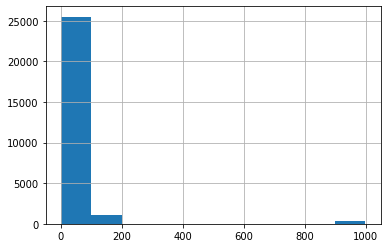

In [214]:
data['Size of Tumor'].hist()


In [215]:
data.loc[data['Size of Tumor'] > 900, 'Size of Tumor'] = np.NaN
data['Size of Tumor'].quantile(0.9)


80.0

<AxesSubplot:>

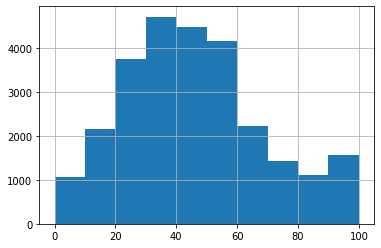

In [216]:
data.loc[data['Size of Tumor'] > 100, 'Size of Tumor'] = 100
data['Size of Tumor'].hist()

In [217]:
data['CEA']
data.loc[data['CEA'] == '80.0', 'CEA'] = np.NaN
data.loc[data['CEA'] == 'Borderline', 'CEA'] = 'Normal'
data['CEA'].value_counts()


20.0     16641
10.0     13242
998.0     3204
997.0      483
30.0       169
988.0       47
Name: CEA, dtype: int64

<AxesSubplot:>

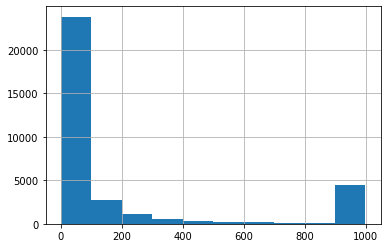

In [218]:
data['CEA value'].hist()


<AxesSubplot:>

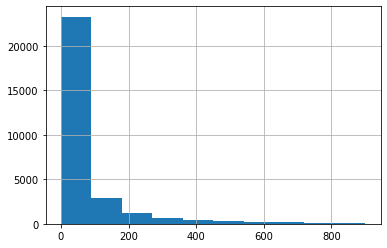

In [219]:
data.loc[data['CEA value'] > 900, 'CEA value'] = np.NaN
data['CEA value'].hist()


In [220]:
data.loc[data['CEA Pretreatment Lab Value SSDI Item 3820'] == 'XXXX.9', 'CEA Pretreatment Lab Value SSDI Item 3820'] = np.NaN
data.loc[data['CEA Pretreatment Lab Value SSDI Item 3820'] == 'XXXX.7', 'CEA Pretreatment Lab Value SSDI Item 3820'] = np.NaN
data.loc[data['CEA Pretreatment Lab Value SSDI Item 3820'] == 'XXXX.8', 'CEA Pretreatment Lab Value SSDI Item 3820'] = np.NaN
data.loc[data['CEA Pretreatment Lab Value SSDI Item 3820'] == 'XXXX.1', 'CEA Pretreatment Lab Value SSDI Item 3820'] = 10000

data['CEA Pretreatment Lab Value SSDI Item 3820'] = data['CEA Pretreatment Lab Value SSDI Item 3820'].astype(float)
data.loc[data['CEA Pretreatment Lab Value SSDI Item 3820'] > 900, 'CEA value'] = np.NaN

In [221]:
#if CEA is missing, fill with CEA Pretreatment Lab Value SSDI Item 3820
data.loc[data['CEA value'].isnull(), 'CEA value'] = data.loc[data['CEA value'].isnull(), 'CEA Pretreatment Lab Value SSDI Item 3820']
data['CEA value'].value_counts(dropna=False)

NaN      15045
5.0        898
10.0       745
12.0       713
15.0       666
         ...  
168.4        1
118.2        1
50.6         1
108.4        1
86.6         1
Name: CEA value, Length: 1506, dtype: int64

In [222]:
data.loc[data['CEA value'] > 900, 'CEA value'] = np.NaN
data['CEA value'].quantile(0.9)

145.0

<AxesSubplot:>

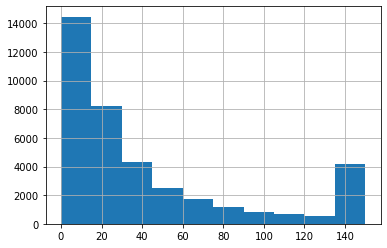

In [223]:
data.loc[data['CEA value'] > 150, 'CEA value'] = 150
data['CEA value'].hist()

In [224]:
# pd.crosstab(data['Chemotherapy at any CoC Facility'], data['Systemic/Surgery Sequence'])

In [225]:
# data['Systemic/Surgery Sequence'].value_counts()

In [226]:
#neo-adjuvant chemotherapy if systemic/surgery sequence is 2 or 4 (neo-adjuvant chemotherapy) and chemotherapy is 3 (multi-agent chemotherapy)
# data['nct'] = 0
# data.loc[((data['Systemic/Surgery Sequence'] == 2) | (data['Systemic/Surgery Sequence'] == 4) & (data['Chemotherapy at any CoC Facility'] == 3)), 'nct'] = 1
# data['nct'].value_counts()

In [227]:
#days between chemo and radiation is chemo days from dx - radiation days from dx
# data['days_chemo_rads'] = data['Chemotherapy, Days from Dx'] - data['Radiation, Days from Dx']

In [228]:
data.shape

(53684, 49)

In [229]:
# data.loc[data['days_chemo_rads'] > 300, 'days_chemo_rads'] = np.NaN
# data.loc[data['days_chemo_rads'] < -300, 'days_chemo_rads'] = np.NaN

In [230]:
# data['days_chemo_rads'].hist(bins=50)

In [231]:
#if chemo started 30 days before radiation, then induction chemotherapy (ict) = 1
# data['ict'] = 0
# data.loc[(data['nct'] == 1) & (data['days_chemo_rads'] < -30), 'ict'] = 1
# data['ict'].value_counts()

In [232]:
#if radiation started 30 days before chemo, then induction chemotherapy (cct) = 1
# data['cct'] = 0
# data.loc[(data['nct'] == 1) & (data['days_chemo_rads'] > 14), 'cct'] = 1
# data['cct'].value_counts()

In [233]:
data.head()

,Case Key,Facility Key,Facility Type,Facility Location,Age at Diagnosis,Sex,Race,Spanish Hispanic Origin,Primary Payor,Census Median Income Quartiles 2008-2012,...,Grade Clinical SSDI Item 3843,KRAS SSDI Item 3866,Microsatellite Instability (MSI) SSDI Item 3890,Perineural Invasion SSDI Item 3909,pstage,pcr,stage,t_stage,n_stage,m_stage
2,D0d14a662-dde0-4a0e-a6f0-a0e0db2d19e2,WIEPJSGATB,3.0,2.0,78.0,2.0,1.0,9.0,3.0,4.0,...,NaN,NaN,NaN,NaN,3A,0.0,2,3.0,0,0.0
6,Dcd9758ae-2308-45cf-bbf1-b3ab4ed2e48f,NWBQYGAYAV,3.0,5.0,70.0,1.0,1.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,0,1.0,2,3.0,0,0.0
14,D656e0503-a772-440d-a60a-c9d8bd9c520b,KOZLUMSSEP,3.0,2.0,82.0,1.0,1.0,0.0,3.0,4.0,...,NaN,NaN,NaN,NaN,3B,0.0,2,3.0,0,0.0
24,D67bf0834-7b7d-41c7-a320-ab0438fe764e,QISENWRSZO,3.0,6.0,51.0,1.0,1.0,0.0,1.0,NaN,...,NaN,NaN,NaN,NaN,0,1.0,3,3.0,1,0.0
29,D1557dfde-4686-4534-8d7f-bf743fdc51bf,OPDMCOUQIW,4.0,3.0,84.0,1.0,1.0,0.0,3.0,3.0,...,NaN,NaN,NaN,NaN,1,0.0,2,3.0,0,0.0


In [234]:
#save the data out to use in rename.ipynb
data.set_index('Case Key', inplace=True, drop=True)
data.to_csv('../data/table1_data.csv', index_label='Case Key')